<a href="https://colab.research.google.com/github/sergiogf93/MetNumerics/blob/master/DAlembertStrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar llibreries

In [0]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time

Definim la funció que dóna el resultat de l'aposta.

In [0]:
def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True

Es defineixen funcions amb diferents estratègies:

* **dAlembert:** Cada cop que es perd, se suma **initial_wager** a la propera aposta. En cas de guanyar, es disminueix la aposta també amb **initial_wager** fins tornar a la quantitat inicial.

* **multiple_bettor:** Si es perd, es multiplica la quantitat a apostar per un nombre aleatori definit prèviament. Quan es guanya es torna a apostar la quantitat inicial.

* **doubler_bettor:** Similar al cas anterior, però el factor multiplicatiu és 2.


In [0]:
def dAlembert(funds,initial_wager,wager_count):#,color):

    global da_busts
    global da_profits
    
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if wager == initial_wager:
                pass
            else:
                wager -= initial_wager

            #print 'current wager:',wager,'value:',value


            if rollDice():
                value += wager
                #print 'we won! Current Value:',value
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                #print 'we lost, current value',value
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    da_busts += 1
                    break
        elif previousWager == 'loss':
            wager = previousWagerAmount + initial_wager
            if (value - wager) <= 0:
                wager = value
            #print 'Lost the last wager, current wager:',wager,'value:',value
            
            if rollDice(): 
                value += wager
                #print 'we won! Current Value:',value
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager
                previousWager = 'loss'
                #print 'we lost, current value',value
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    da_busts += 1
                    break

        currentWager += 1

    plt.plot(wX,vY)

    if value > funds:
        da_profits+=1




    



def multiple_bettor(funds,initial_wager,wager_count):#,color):

    global multiple_busts
    global multiple_profits
    
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                value += wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    multiple_busts += 1
                    break
        elif previousWager == 'loss':
            if rollDice():
                wager = previousWagerAmount * random_multiple
                if (value - wager) <= 0:
                    wager = value
                    
                value += wager
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * random_multiple
                if (value - wager) <= 0:
                    wager = value
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    multiple_busts += 1
                    break

        currentWager += 1

    plt.plot(wX,vY)

    if value > funds:
        multiple_profits+=1


def doubler_bettor(funds,initial_wager,wager_count,color):
    global doubler_busts
    global doubler_profits
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                value += wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    currentWager += 10000000000000000
                    doubler_busts += 1
        elif previousWager == 'loss':
            if rollDice():
                wager = previousWagerAmount * 2
                if (value - wager) < 0:
                    wager = value
                    
                value += wager
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                if (value - wager) < 0:
                    wager = value
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    currentWager += 10000000000000000
                    doubler_busts += 1

        currentWager += 1
    #plt.plot(wX,vY,color)
    if value > funds:
        doubler_profits+=1


Podem estudiar la taxa de pèrdua i de benefici segons quin bettor fem servir:

####################################
To beat:
Lower Bust Rate Than: 19.0
Higher profit rate than: 69.0
Bust Rate: 22.6
Profit Rate: 56.7
####################################


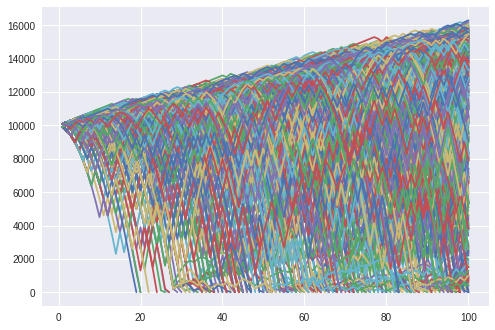

In [21]:
lower_bust = 19.00
higher_profit = 69.00

startingFunds = 10000
wagerSize = 100
wagerCount = 100

x = 0

while x < 1:
    
    da_busts = 0.0
    da_profits = 0.0
    multiple_busts = 0.0
    multiple_profits = 0.0
    daSampSize = 1000
    currentSample = 1
    
    random_multiple = random.uniform(0.6,2.0)
    while currentSample <= daSampSize:
        dAlembert(startingFunds,wagerSize,wagerCount)
#         multiple_bettor(startingFunds,wagerSize,wagerCount)
        currentSample += 1

    if ((da_busts/daSampSize)*100.00 < lower_bust) and ((da_profits/daSampSize)*100.00 > higher_profit):
#     if ((multiple_busts/daSampSize)*100.00 < lower_bust) and ((da_profits/daSampSize)*100.00 > higher_profit):
        print '#################################################'
        print 'found a winner, the multiple was:',random_multiple
        print 'Lower Bust Rate Than:',lower_bust
        print 'Higher profit rate than:',higher_profit
        print 'Bust Rate:',(da_busts/daSampSize)*100.00
        print 'Profit Rate:',(da_profits/daSampSize)*100.00
#         print 'Bust Rate:',(multiple_busts/daSampSize)*100.00
#         print 'Profit Rate:',(multiple_profits/daSampSize)*100.00
        print '#################################################'
        time.sleep(5)
        plt.show()
    else:

        print '####################################'
        print 'To beat:'
        print 'Lower Bust Rate Than:',lower_bust
        print 'Higher profit rate than:',higher_profit
        print 'Bust Rate:',(da_busts/daSampSize)*100.00
        print 'Profit Rate:',(da_profits/daSampSize)*100.00
#         print 'Bust Rate:',(multiple_busts/daSampSize)*100.00
#         print 'Profit Rate:',(multiple_profits/daSampSize)*100.00
        print '####################################'

        #clears the figure
#         plt.clf()
        

    x+=1
